<a href="https://colab.research.google.com/github/gomesluiz/pln-na-pratica/blob/main/03-processamento-de-texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas de Pré-processamento

In [ ]:
# Bibliotecas que precisam ser instaladas para a prática:
!pip install nltk==3.8.1
!pip install spacy==3.7.2
!pip install unidecode==1.3.8
!pip install wikipedia==1.4.0

In [ ]:
# Declara define funções utilitárias utilizadas no notebook.
import datetime
import sys
def formata_msg(nivel, msg):
    """
    Formata uma mensagem de log incluindo o nível de severidade, timestamp
    e a mensagem.

    Parâmetros:
    - nivel (str): Nível de severidade da mensagem (ex: 'INFO', 'ERROR', 'WARNING').
    - msg (str): A mensagem de log propriamente dita.

    Retorna:
    - str: A mensagem de log formatada.
    """
    timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    return f"[{nivel}] {timestamp} - {msg}"

print(formata_msg("INFO", "Funções utilitárias prontas para utilização."))
print(formata_msg("INFO", f"Versão do Python: {sys.version} "))

[INFO] 2024-02-18 00:46:32 - Funções utilitárias prontas para utilização.
[INFO] 2024-02-18 00:46:32 - Versão do Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] 


In [ ]:
# Importa módulos essenciais para funcionalidades do notebook.
import re
import string

import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from unidecode import unidecode

import wikipedia

print(formata_msg("INFO", "Bibliotecas importadas com sucesso; ambiente pronto."))

[INFO] 2024-02-18 01:33:01 - Bibliotecas importadas com sucesso; ambiente pronto.


In [ ]:
# Baixa as bibliotecas necessárias do NLTK
nltk.download("stopwords")  # Baixa lista de stopwords
nltk.download('punkt')      # Baixa dados para o tokenizador
nltk.download('rslp')       # Baixa o stemmer RSLP para o português

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## Wikipedia

A Wikipedia é uma enciclopédia digital gratuita e de código aberto que permite aos usuários ler e editar seu conteúdo. É a maior e mais popular referência geral na internet, caracterizada por seu modelo colaborativo onde voluntários de todo o mundo contribuem com informações em diversos idiomas. Para acessar e interagir com o conteúdo da Wikipedia por meio de programas em Python, podemos utilizar o pacote wikipedia, uma biblioteca Python que facilita a busca e a recuperação de artigos, a obtenção de resumos, links e outras informações disponíveis na Wikipedia

In [ ]:
# Define o idioma da Wikipedia para Português
wikipedia.set_lang("pt")

# Busca a página da Wikipedia sobre Processamento de Linguagem Natural (PLN)
pln = wikipedia.page("PLN")

# Extrai o conteúdo da página como um corpus de texto
corpus = pln.content

print(formata_msg("INFO",f"Conteúdo textual da URL {pln.url}:\n"))
print("--- INÍCIO ---")
print(pln.content)
print("--- TÉRMINO ---")

[INFO] 2024-02-18 01:52:19 - Conteúdo textual da URL https://pt.wikipedia.org/wiki/Processamento_de_linguagem_natural:

--- INÍCIO ---
Processamento de língua natural (PLN) é uma subárea da ciência da computação, inteligência artificial e da linguística que estuda os problemas da geração e compreensão automática de línguas humanas naturais. Sistemas de geração de língua natural convertem informação de bancos de dados de computadores em linguagem compreensível ao ser humano e sistemas de compreensão de língua natural convertem ocorrências de linguagem humana em representações mais formais, mais facilmente manipuláveis por programas de computador. Alguns desafios do PLN são compreensão de língua natural, fazer com que computadores extraiam sentido de linguagem humana ou natural e geração de língua natural.


== História ==
A história do PLN começou na década de 1950, quando Alan Turing publicou o artigo "Computing Machinery and Intelligence", que propunha o que agora é chamado de teste d

## 1. Tokenização
A tokenização é o ponto de partida do pré-processamento de textos, focando na separação do conteúdo em suas menores unidades, sejam palavras, termos ou 'tokens'. Essas unidades podem variar entre palavras, números e até sinais de pontuação, fundamentais para a compreensão e análise de textos em linguagem natural. A identificação precisa desses elementos é essencial para o tratamento eficaz do texto. Existem várias técnicas para realizar a tokenização, destacando-se:

* Uso da função **split()** para dividir o texto em tokens com base em espaços ou outros delimitadores.
* Emprego de **expressões regulares (Regex)** para uma tokenização mais complexa e flexível.
* Aplicação da biblioteca **Natural Language Toolkit(NLTK)**, especializada em linguagem natural, que oferece ferramentas avançadas para tokenização e outras tarefas de processamento de texto.


### Split

Faça utilizando o método abaixo
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
str.split()
```

In [ ]:
tokens_split = corpus.split()
print(tokens)
print(len(tokens))

['Processamento', 'de', 'língua', 'natural', '(PLN)', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação,', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais,', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural,', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural.', '==', 'História', '==', 

### Regex

Faça utilizando o método abaixo
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
```

In [ ]:
tokens_regex = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
print(tokens_regex)

['Processamento', 'de', 'língua', 'natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural

### NLTK

Faça utilizando o método abaixo.
<b> Não esqueça de armazenar o resultado na variável abaixo. </b>

```python
nltk.word_tokenize(corpus, language='portuguese')
```

In [ ]:
tokens_nltk = nltk.word_tokenize(corpus, language='portuguese')
print(tokens_nltk)

['Processamento', 'de', 'língua', 'natural', '(', 'PLN', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'Sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'Alguns', 'desafios', 'do', 'PLN', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural

In [ ]:
def plot_frequencia_tokens(tokens):
    fd_words = FreqDist(tokens)
    fd_words.plot(20)

### Plot das tokenizações

Plote o resultado de cada uma das tokenizações.
Utilize o método <b> plot_frequencia_tokens() </b> para plotar o gráfico.
Também imprima o <b> tamanho de cada tokenização </b>

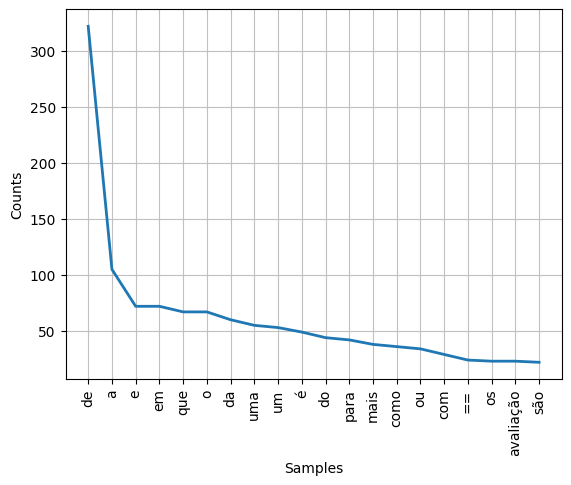

In [ ]:
# Split
plot_frequencia_tokens(tokens_split)

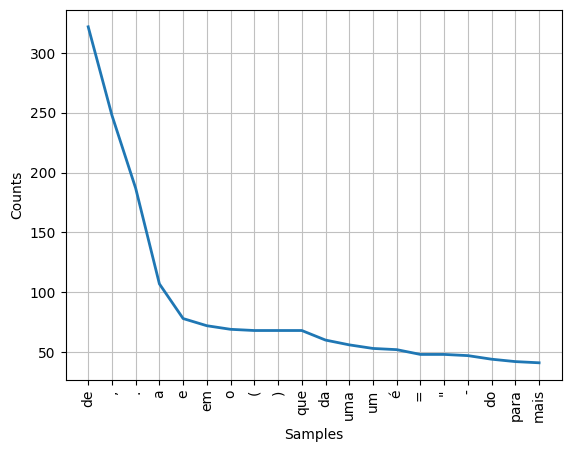

In [ ]:
# Regex
plot_frequencia_tokens(tokens_regex)

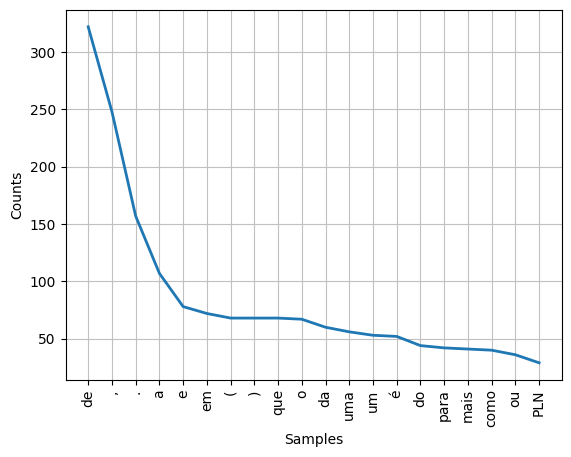

In [ ]:
# NLTK
plot_frequencia_tokens(tokens_nltk)

Como foi possível observar, existem variações nas tokenizações realizadas.
A que gerou mais tokens foi a que utilizou regex.
Por isso iremos utilizá-la a partir deste ponto.
Utilize o resultado de <b> tokens_regex</b>.

## Capitalização

traforme todos os tokens para minúsculo utilizando a função abaixo:

```python
str.lower()
```

In [ ]:
tokens_regex_minusculos = [token.lower() for token in tokens_regex]
print(tokens_regex_minusculos)

['processamento', 'de', 'língua', 'natural', '(', 'pln', ')', 'é', 'uma', 'subárea', 'da', 'ciência', 'da', 'computação', ',', 'inteligência', 'artificial', 'e', 'da', 'linguística', 'que', 'estuda', 'os', 'problemas', 'da', 'geração', 'e', 'compreensão', 'automática', 'de', 'línguas', 'humanas', 'naturais', '.', 'sistemas', 'de', 'geração', 'de', 'língua', 'natural', 'convertem', 'informação', 'de', 'bancos', 'de', 'dados', 'de', 'computadores', 'em', 'linguagem', 'compreensível', 'ao', 'ser', 'humano', 'e', 'sistemas', 'de', 'compreensão', 'de', 'língua', 'natural', 'convertem', 'ocorrências', 'de', 'linguagem', 'humana', 'em', 'representações', 'mais', 'formais', ',', 'mais', 'facilmente', 'manipuláveis', 'por', 'programas', 'de', 'computador', '.', 'alguns', 'desafios', 'do', 'pln', 'são', 'compreensão', 'de', 'língua', 'natural', ',', 'fazer', 'com', 'que', 'computadores', 'extraiam', 'sentido', 'de', 'linguagem', 'humana', 'ou', 'natural', 'e', 'geração', 'de', 'língua', 'natural

 <b> <span style="color:red"> Lembre de utilizar a VARIÁVEL que contém o resultado da transformação anterior </span> </b>

## Remoção Stopwords

remova todas as stopwords retornadas pelo pacote NLTK da lista de tokens.

```python
portugues_stops = stopwords.words('portuguese')
```

Note que a variável "portugues_stops" é uma lista de palavras.

In [ ]:

portugues_stops = stopwords.words('portuguese')

In [ ]:
tokens_sem_stop = [token for token in tokens_regex_minusculos if token not in portugues_stops]
print(tokens_sem_stop)

['processamento', 'língua', 'natural', '(', 'pln', ')', 'subárea', 'ciência', 'computação', ',', 'inteligência', 'artificial', 'linguística', 'estuda', 'problemas', 'geração', 'compreensão', 'automática', 'línguas', 'humanas', 'naturais', '.', 'sistemas', 'geração', 'língua', 'natural', 'convertem', 'informação', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensível', 'humano', 'sistemas', 'compreensão', 'língua', 'natural', 'convertem', 'ocorrências', 'linguagem', 'humana', 'representações', 'formais', ',', 'facilmente', 'manipuláveis', 'programas', 'computador', '.', 'alguns', 'desafios', 'pln', 'compreensão', 'língua', 'natural', ',', 'fazer', 'computadores', 'extraiam', 'sentido', 'linguagem', 'humana', 'natural', 'geração', 'língua', 'natural', '.', '=', '=', 'história', '=', '=', 'história', 'pln', 'começou', 'década', '1950', ',', 'alan', 'turing', 'publicou', 'artigo', '"', 'computing', 'machinery', 'and', 'intelligence', '"', ',', 'propunha', 'agora', 'chamado', 'test

## Remoção Números

remova todos os números, utilizando uma regex

```python
re.sub(__,__,__)
```

In [ ]:
# Removendo números de cada elemento e filtrando elementos vazios em uma única etapa
tokens_sem_numbers = [re.sub(r'\d+', '', palavra) for palavra in tokens_sem_stop if re.sub(r'\d+', '', palavra)]

print("Lista original:", tokens_sem_stop)
print("Lista processada:", tokens_sem_numbers)


Lista original: ['processamento', 'língua', 'natural', '(', 'pln', ')', 'subárea', 'ciência', 'computação', ',', 'inteligência', 'artificial', 'linguística', 'estuda', 'problemas', 'geração', 'compreensão', 'automática', 'línguas', 'humanas', 'naturais', '.', 'sistemas', 'geração', 'língua', 'natural', 'convertem', 'informação', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensível', 'humano', 'sistemas', 'compreensão', 'língua', 'natural', 'convertem', 'ocorrências', 'linguagem', 'humana', 'representações', 'formais', ',', 'facilmente', 'manipuláveis', 'programas', 'computador', '.', 'alguns', 'desafios', 'pln', 'compreensão', 'língua', 'natural', ',', 'fazer', 'computadores', 'extraiam', 'sentido', 'linguagem', 'humana', 'natural', 'geração', 'língua', 'natural', '.', '=', '=', 'história', '=', '=', 'história', 'pln', 'começou', 'década', '1950', ',', 'alan', 'turing', 'publicou', 'artigo', '"', 'computing', 'machinery', 'and', 'intelligence', '"', ',', 'propunha', 'agora', 

## Remoção Pontuação

remova todas as pontruações retornadas pelo pacote string da lista de tokens.

```python
string.punctuation
```

In [ ]:

tokens_sem_punction = [token for  token in tokens_sem_numbers if token not in string.punctuation]
print(tokens_sem_punction)

['processamento', 'língua', 'natural', 'pln', 'subárea', 'ciência', 'computação', 'inteligência', 'artificial', 'linguística', 'estuda', 'problemas', 'geração', 'compreensão', 'automática', 'línguas', 'humanas', 'naturais', 'sistemas', 'geração', 'língua', 'natural', 'convertem', 'informação', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensível', 'humano', 'sistemas', 'compreensão', 'língua', 'natural', 'convertem', 'ocorrências', 'linguagem', 'humana', 'representações', 'formais', 'facilmente', 'manipuláveis', 'programas', 'computador', 'alguns', 'desafios', 'pln', 'compreensão', 'língua', 'natural', 'fazer', 'computadores', 'extraiam', 'sentido', 'linguagem', 'humana', 'natural', 'geração', 'língua', 'natural', 'história', 'história', 'pln', 'começou', 'década', 'alan', 'turing', 'publicou', 'artigo', 'computing', 'machinery', 'and', 'intelligence', 'propunha', 'agora', 'chamado', 'teste', 'turing', 'critério', 'inteligência', 'experiência', 'georgetown', 'envolveu', 'trad

## Remoção Acentos

remova todos os acentos utilizando a função abaixo:

```python
unidecode(str)
```

In [ ]:
tokens_sem_acentos = [unidecode(token) for token in tokens_sem_punction]
print(tokens_sem_acentos)

['processamento', 'lingua', 'natural', 'pln', 'subarea', 'ciencia', 'computacao', 'inteligencia', 'artificial', 'linguistica', 'estuda', 'problemas', 'geracao', 'compreensao', 'automatica', 'linguas', 'humanas', 'naturais', 'sistemas', 'geracao', 'lingua', 'natural', 'convertem', 'informacao', 'bancos', 'dados', 'computadores', 'linguagem', 'compreensivel', 'humano', 'sistemas', 'compreensao', 'lingua', 'natural', 'convertem', 'ocorrencias', 'linguagem', 'humana', 'representacoes', 'formais', 'facilmente', 'manipulaveis', 'programas', 'computador', 'alguns', 'desafios', 'pln', 'compreensao', 'lingua', 'natural', 'fazer', 'computadores', 'extraiam', 'sentido', 'linguagem', 'humana', 'natural', 'geracao', 'lingua', 'natural', 'historia', 'historia', 'pln', 'comecou', 'decada', 'alan', 'turing', 'publicou', 'artigo', 'computing', 'machinery', 'and', 'intelligence', 'propunha', 'agora', 'chamado', 'teste', 'turing', 'criterio', 'inteligencia', 'experiencia', 'georgetown', 'envolveu', 'trad

###  Plote a frequência dos tokens sem acentos. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista.

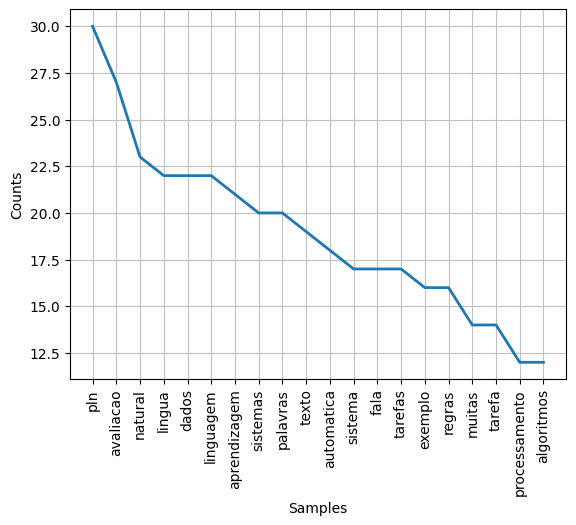

In [ ]:
# plot tokens_sem_acentos
plot_frequencia_tokens(tokens_sem_acentos)

## Stemming

Iremos utilizar o stemming da biblioteca NLTK. O algoritmo disponível para este procedimento em portugês é o RSLPStemmer.

```python
stemmer = nltk.stem.RSLPStemmer()
```

Aplique o stemmet em cada elemento da lista de tokens.


In [ ]:
stemmer = nltk.stem.RSLPStemmer()
tokens_stemmer =

###  Plote a frequência dos tokens após o processo de stemming. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista.

In [ ]:
# plot tokens_stemmer

## Lemmatization
a biblitoteca NLTK não possui lematização para português.
Mas a scpaCy possui.

In [ ]:
import pt_core_news_sm

ModuleNotFoundError: No module named 'pt_core_news_sm'

In [ ]:
#carrega o modelo para português
nlp = pt_core_news_sm.load()

A primeira etapa para executar a lematização é transformar a lista de tokens para uma string.
Utilize a variável de tokens: <b> tokens_sem_punction </b>.
Você pode executar a <b> lematização </b> com acentos ou sem acentos. Funciona da mesma forma.

Dica: utilize o método join para isto:

```python
str.join(list)

```

In [ ]:
str_tokens = ' '.join(tokens_sem_punction)
#str_tokens = ' '.join(tokens_sem_acentos)

Depois carregue a string de tokens (<b>str_tokens</b>) no modelo <b> nlp </b>, carregado em um dos passos anteriores.

```python
doc = nlp(str_tokens)
```

In [ ]:
doc =

Verifique o tipo da variável <b> doc </b>.
Observe que é do tipo spacy.tokens.doc.Doc

In [ ]:
type(doc)

spacy.tokens.doc.Doc

Como tipo da variável doc é do tipo spacy.tokens.doc.Doc.
Apenas é preciso iterar em cada token e retornar o atributo <b> lemma_</b>

In [ ]:
tokens_lemm =

###  Plote a frequência dos tokens após o processo de lematização. Utilize o método plot_frequencia_tokens() para plotar o gráfico. Também imprima o tamanho desta lista.

In [ ]:
# plot tokens_lemm